In [4]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
X = pd.read_csv("train_features_improved.csv")
# X_small = np.array(df1.iloc[:, :].values,  dtype=float)[::12]
# X = np.array(df1.iloc[:, :].values,  dtype=float)
# df = pd.DataFrame(X, columns = df1.columns)

Y = pd.read_csv("train_labels.csv")
# Y = np.array(labels_df.iloc[:, :].values,  dtype=float)

print(X.shape)
print(Y.shape)



(18995, 514)
(18995, 16)


<AxesSubplot:>

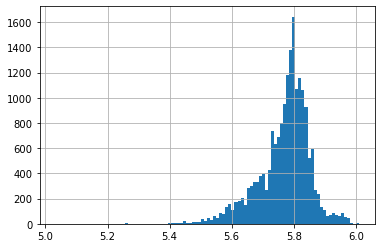

In [23]:
# X["0"].hist(bins=100)
np.log(X["0"]).hist(bins=100)

In [4]:
for label in ['LABEL_Sepsis']:
# for label in ['LABEL_BaseExcess']:
# for label in ['LABEL_SpO2']:
# for label in ['LABEL_Sepsis','LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2', 'LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']:
    X[label] = Y[label]
    # X = X.drop(label,1)   #Feature Matrix
    # y = X[label]          #Target Variable
    # cor = X.corr()
    cor = Y.corr()
    #Correlation with output variable
    cor_target = abs(cor[label])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.05]
    #sort
    relevant_features.sort_values(inplace=True, ascending=False)
    print(relevant_features)
    print("\n ")

# df["sepsis"] = Y2
# cor = X.corr()
# df.head()
# print(df.shape)

LABEL_Sepsis              1.000000
LABEL_Lactate             0.249775
LABEL_SaO2                0.162077
LABEL_BaseExcess          0.155503
LABEL_Bilirubin_total     0.132103
LABEL_AST                 0.130625
LABEL_Alkalinephos        0.130139
LABEL_EtCO2               0.122417
LABEL_Fibrinogen          0.097815
LABEL_Bilirubin_direct    0.090272
LABEL_RRate               0.076211
LABEL_Heartrate           0.074140
Name: LABEL_Sepsis, dtype: float64

 


In [3]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y['LABEL_Sepsis'])
mi_scores

KeyboardInterrupt: 

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
# cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["sepsis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

KeyError: 'sepsis'